# HomeWork 4 for GEOG 210A F25

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import seaborn as sns

pd.options.display.float_format = '{:.2e}'.format

## Read the survivorship dataset

In [2]:
life_table = pd.read_csv('/Users/houpuli/Downloads/us_survivorship_data_2023.txt', header=1)
life_table

,%Age,Male number of lives,Female number of lives
0,0,100000,100000
1,1,99398,99487
2,5,99275,99392
3,10,99208,99336
4,15,99110,99269
5,20,98705,99108
6,25,98024,98851
7,30,97145,98505
8,35,96020,97999
9,40,94685,97333


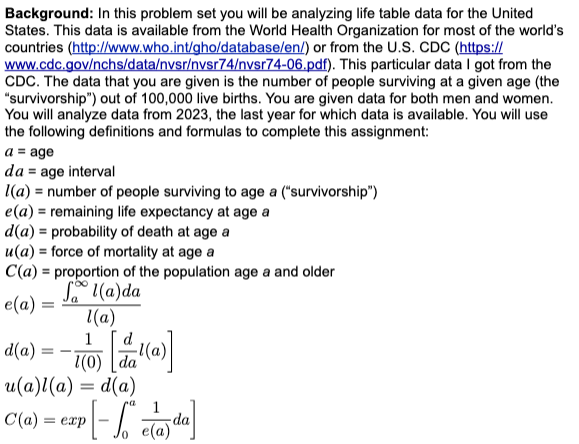

## Question 1: 
<font color="orange">
Open the survivorship dataset in your Python workspace.


a) Calculate the life expectancy as a function of age for both males and females in 2023. Plot the life expectancy for males and females as a function of age.
</font>

I think for the Question 1a, the life expectancy at age a can be calculated using the following formula:
$$
e(a) = ∫_a^∞ l(x) dx / l(a)
$$

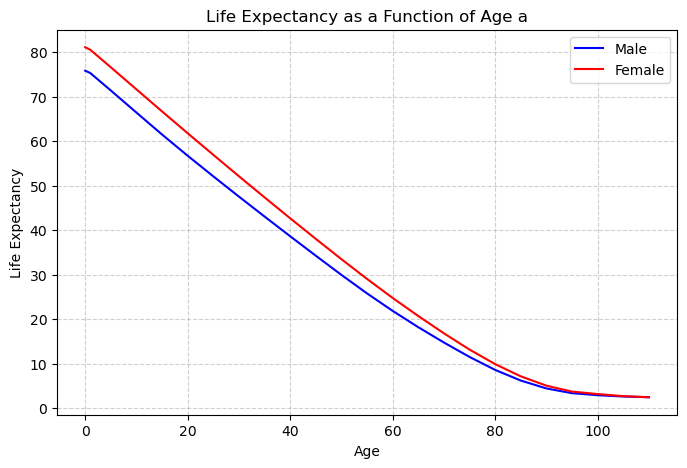

In [3]:
# === Step 1. Extract relevant columns ===
a = life_table['%Age'].to_numpy()               # age
l_m = life_table['Male number of lives'].to_numpy()   # l(a) for males
l_f = life_table['Female number of lives'].to_numpy() # l(a) for females

# === Step 2. Calculate life expectancy e(a) ===
e_m = np.zeros(len(a))
e_f = np.zeros(len(a))

for i in range(len(a)):
    # --- Male ---
    x = a[i:]
    y = l_m[i:]
    da = np.diff(x)  # age intervals
    fmid = 0.5 * (y[1:] + y[:-1])        # trapezoidal average
    f_int = np.sum(fmid * da)         # ∫ l(x) dx from a_i to ∞
    if l_m[i] > 0:
        e_m[i] = f_int / l_m[i]       # e(a) = ∫ l / l(a)
    else:
        e_m[i] = np.nan

    # --- Female ---
    x = a[i:]
    y = l_f[i:]
    da = np.diff(x)
    fmid = 0.5 * (y[1:] + y[:-1])
    f_int = np.sum(fmid * da)
    if l_f[i] > 0:
        e_f[i] = f_int / l_f[i]
    else:
        e_f[i] = np.nan

# === Step 3. Create a DataFrame to store results ===
life_expectancy = pd.DataFrame({
    'a (Age)': a,
    'e_m (male life expectancy)': e_m,
    'e_f (female life expectancy)': e_f
})

# === Step 4. Plot e(a) ===
plt.figure(figsize=(8,5))
plt.plot(a, e_m, color='blue', label='Male')
plt.plot(a, e_f, color='red', label='Female')
plt.xlabel('Age')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy as a Function of Age a')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<font color="orange">b) At what age are the age (time lived) and life expectancy (time left to live) equal for females? For males?</font>

As figure shown below,   

For females, the age and life expectancy are equal lower than 40 years old(around 39 years old), but for males, over 40 years old(around 42 years old).

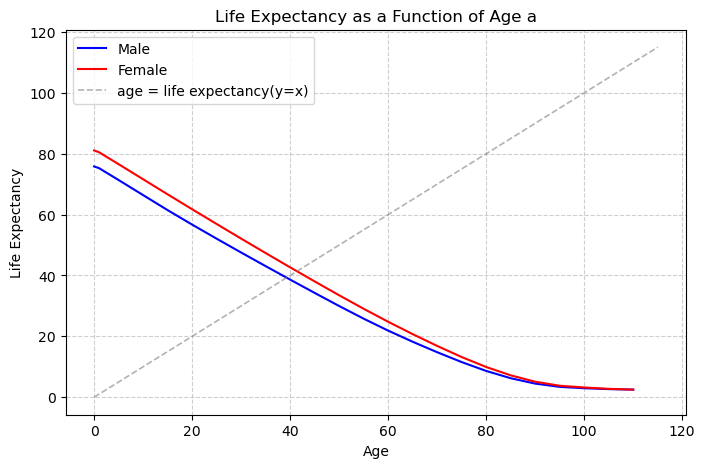

In [4]:
# === Plot e(a) ===
plt.figure(figsize=(8,5))
plt.plot(a, e_m, color='blue', label='Male')
plt.plot(a, e_f, color='red', label='Female')
# Add y = x line
plt.plot(a, a, color='gray', linestyle='--', linewidth=1.2, label='age = life expectancy(y=x)',alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy as a Function of Age a')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Question 2: 
<font color="orange">
Calculate the probability of death as a function of age for males and females.


a) Plot d(a) for both males and females in 2023. Use a log scale for the y-axis
</font>

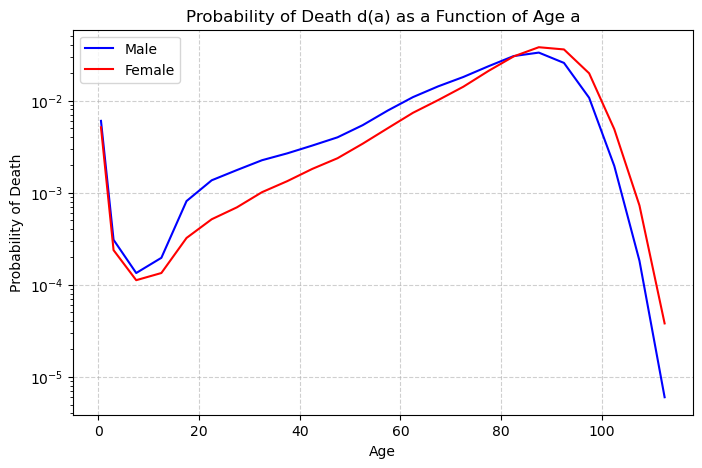

In [5]:
# === Step 1. Compute derivative dl/da using discrete differences ===
da = np.diff(a)
dl_m = np.diff(l_m)
dl_f = np.diff(l_f)

# === Step 2. Compute d(a) = -1 / l(0) * (dl/da) ===
l0_m = l_m[0]
l0_f = l_f[0]

# === Step 3. Because np.diff gives len-1 result, we associate each difference with mid-age ===
a_mid = 0.5 * (a[1:] + a[:-1])

d_m = - (1 / l0_m) * (dl_m / da)
d_f = - (1 / l0_f) * (dl_f / da)

# === Step 4. Plot results (log scale) ===
plt.figure(figsize=(8,5))
plt.plot(a_mid, d_m, color='blue', label='Male')
plt.plot(a_mid, d_f, color='red', label='Female')
plt.yscale('log')  # log scale for y-axis
plt.xlabel('Age')
plt.ylabel('Probability of Death')
plt.title('Probability of Death d(a) as a Function of Age a')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<font color="orange">
b) Evaluate the area under the d(a) curve for both males and females. What is the physical interpretation of this area?
</font>

We can conclude at least two points from the figure: 
- During the infant period, both males and females have a high probability of death. This is likely due to infants’ weaker resistance to viruses and diseases. The death probability up to summit around 85–90 years old for male and female.  
- When comparing males and females, we can observe two different death-probability distributions. Specifically, between ages 5 and 85, males have a higher death probability than females (about 1–2 times higher), while from 85 to 115, the situation is reversed.

<font color="orange">
c) What is the most probable age of death for females? For males?
</font>

From the figure above, we can see that the most probable age of death is approximately 88 years old for both males and females.

## Question 3: 
<font color="orange">
Calculate the force of mortality as a function of age for males and females.

a) Plot u(a) for both males and females in 2023. Use a log scale for the y-axis.
</font>

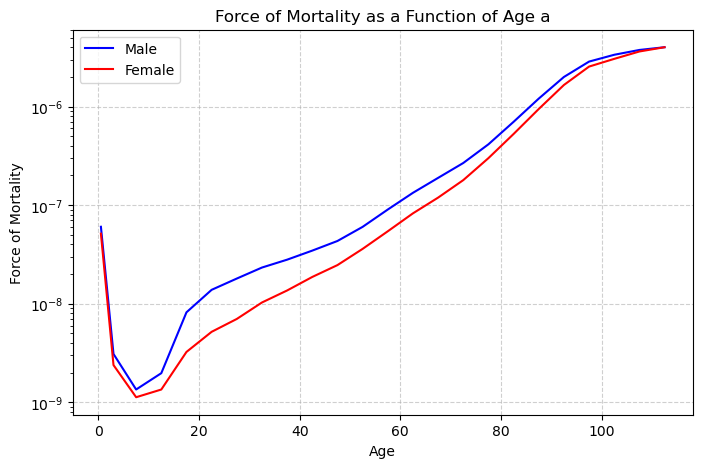

In [6]:
# === Step 1. Compute midpoint survivorship l_mid(a) ===
l_m_mid = 0.5*(l_m[1:] + l_m[:-1])
l_f_mid = 0.5*(l_f[1:] + l_f[:-1])

# === Step 2. calcualte the u(a) ===
u_m = np.where(l_m_mid > 0, d_m / l_m_mid, np.nan)
u_f = np.where(l_f_mid > 0, d_f / l_f_mid, np.nan)

# === Step 3. Plot results (log scale) ===
plt.figure(figsize=(8,5))
plt.plot(a_mid, u_m, label='Male', color='blue')
plt.plot(a_mid, u_f, label='Female', color='red')
plt.yscale('log')
plt.xlabel('Age')
plt.ylabel('Force of Mortality')
plt.title('Force of Mortality as a Function of Age a')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<font color="orange">
b) Plot the ratio of u(a) for males to u(a) for females as a function of age. When is this ratio at a maximum? Why?
</font>

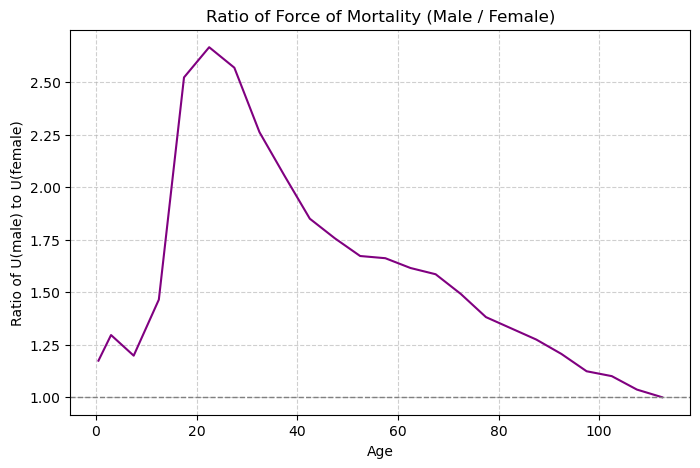

In [7]:
# === Step 1. Compute the ratio ===
u_ratio = np.where(u_f > 0, u_m / u_f, np.nan)

# === Step 2. Plot the ratio as a function of age ===
plt.figure(figsize=(8,5))
plt.plot(a_mid, u_ratio, color='purple')
plt.xlabel('Age')
plt.ylabel('Ratio of U(male) to U(female)')
plt.title('Ratio of Force of Mortality (Male / Female)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1) 
plt.show()

From the figure shown above, we can find the 22/23 years old, the ratio up to the summit, A plausible explanation is higher risk-taking behaviors (e.g., dangerous driving), which are more prevalent among young men.

## Question 4: 
<font color="orange">
Calculate the proportion of the population age a and older for males and females.

a) Plot C(a) for both males and females in 2023.
</font>

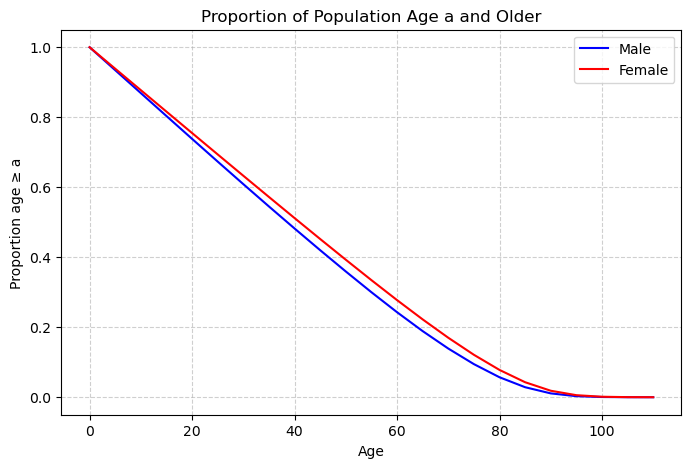

In [8]:
# === Step 1. compute 1/e(a) and midpoint averages ===
da = np.diff(a)
inv_e_m_mid = 0.5 * (1.0/e_m[1:] + 1.0/e_m[:-1])
inv_e_f_mid = 0.5 * (1.0/e_f[1:] + 1.0/e_f[:-1])

# === Step 2. numerical indefinite integral ===
F0 = 0.0
F_m = np.cumsum(inv_e_m_mid * da) + F0    
F_f = np.cumsum(inv_e_f_mid * da) + F0

# === Step 3. fuction: F_m(a_i) ≈ ∫_0^{a_i} 1/e(x) dx ===
C_m = np.exp(-F_m)
C_f = np.exp(-F_f)
C_m = np.insert(C_m, 0, 1.0)   # insert C(0)=1.0 at the front
C_f = np.insert(C_f, 0, 1.0)   # insert C(0)=1.0 at the front

# === Step 4. plot C(a) ===
plt.figure(figsize=(8,5))
plt.plot(a, C_m, label='Male', color='blue')
plt.plot(a, C_f, label='Female', color='red')
plt.xlabel('Age')
plt.ylabel('Proportion age ≥ a')
plt.title('Proportion of Population Age a and Older')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<font color="orange">
b) What is the median age for males in the US (50% of population is older than that age, 50% is younger)? What is the median age for females?
</font>

from the figure shown as below, we can find the median age for male is lower than 40 years old(38 years old), and higher than 40 years old for female(41 years old)

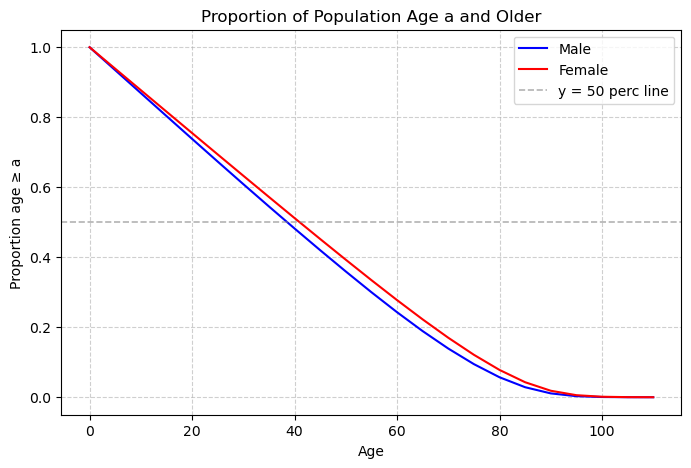

In [9]:
# === Step 4. plot C(a) ===
plt.figure(figsize=(8,5))
plt.plot(a, C_m, label='Male', color='blue')
plt.plot(a, C_f, label='Female', color='red')
# Add y = 0.5 line
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.2, alpha=0.6, label='y = 50 perc line')
plt.xlabel('Age')
plt.ylabel('Proportion age ≥ a')
plt.title('Proportion of Population Age a and Older')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<font color="orange">
c) What percent of the US female population is past the retirement age (65 years)? What percent of the male population is past retirement age?
</font>

From the figure below, we can see that the survival percentage for males drops to about 19% after the retirement age (65 years old), while it remains slightly higher for females (around 22%).

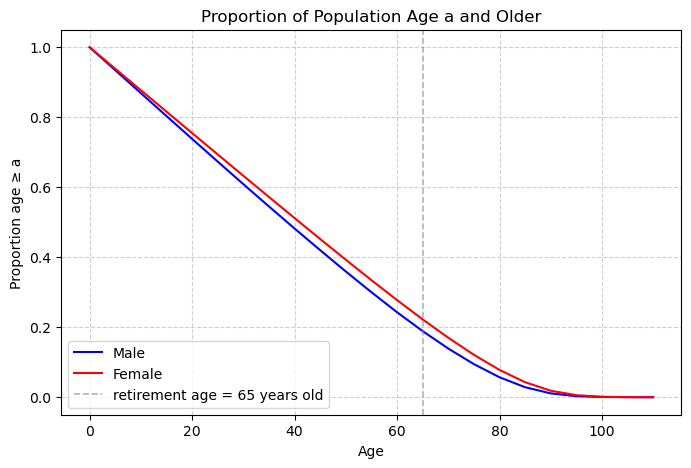

In [10]:
# === Step 4. plot C(a) ===
plt.figure(figsize=(8,5))
plt.plot(a, C_m, label='Male', color='blue')
plt.plot(a, C_f, label='Female', color='red')
# Add x = 65 line
plt.axvline(x=65, color='gray', linestyle='--', linewidth=1.2, alpha=0.6, label='retirement age = 65 years old')
plt.xlabel('Age')
plt.ylabel('Proportion age ≥ a')
plt.title('Proportion of Population Age a and Older')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()